# やること

# 関数作成
## (X,t)を作る。
## $\phi_0,...,\phi_{M-1}$を作る。
e.g. $\phi_0(x)=1, \phi_1(x)=x, \phi_2(x)=x^2,\ldots$
## $\Phi$を計算する
## $\omega$を計算する

# Cross-Validation

## (X,t)をK分割する。
## それぞれの分割kについて以下をやる。
    ### k番目以外を使って関数を作る。
    ### k番目を使って
1. $(x,t)$ をプロット
2. $(x,\omega \phi(x))$をプロット
3.2乗誤差 $|\omega \phi(x)-t|^2$とRMS(Root mean squre) $\sqrt{ \sum_n |\omega \phi(x_n)-t_n|^2 /N_k}$を計算して評価.

In [1]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [23]:
xy_min = -1
xy_max = 1
n_division = 10

x = np.linspace(xy_min, xy_max, n_division+1)

X=np.meshgrid(x,x)
t=np.sin(X[0])+3*np.cos(X[1])+X[0]*X[1]
#Ｘは(n_division+1)^2個の点の集まり。
#X[0]はx座標の集まり. X[1]はy座標の集まり。

standard_deviation = .1
mean = .0
normal_random_generator = np.random.normal
#正規分布にしたがうランダムノイズを生成する。最小二乗法の前提：誤差は正規分布

t_noised=t+ normal_random_generator(mean, standard_deviation,X[0].shape)

In [24]:
#(i.j)のところの点の座標は以下
i=5
j=2
X[0][i][j],X[1][i][j]

(-0.59999999999999998, 0.0)

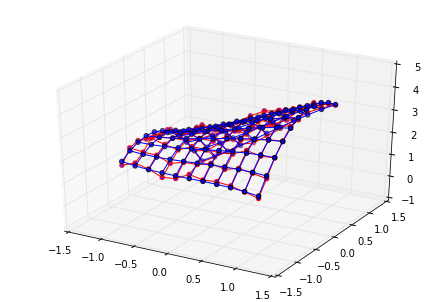

In [25]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X[0],X[1],t) #<---ここでplot
ax.scatter(X[0],X[1],t) #<---ここでplot

ax.scatter(X[0],X[1],t_noised,color='red') #<---ここでplot
ax.plot_wireframe(X[0],X[1],t_noised,color='red') #<---ここでplot



In [41]:
x_array=np.reshape(X[0],np.size(X[0]))
y_array=np.reshape(X[1],np.size(X[1]))
t_array=np.reshape(t,np.size(t))


[ 1.77943593  1.70355083  1.65626444  1.63148858  1.62223759  1.62090692
  1.61957625  1.61032526  1.58554939  1.53826301  1.4623779   2.04864914
  2.01276404  2.00547765  2.02070179  2.0514508   2.09012013  2.12878946
  2.15953847  2.1747626   2.16747622  2.13159111  2.23453586  2.23865075
  2.27136437  2.3265885   2.39733751  2.47600684  2.55467618  2.62542519
  2.68064932  2.71336294  2.71747783  2.321712    2.36582689  2.43854051
  2.53376464  2.64451365  2.76318298  2.88185231  2.99260132  3.08782546
  3.16053907  3.20465397  2.29872875  2.38284364  2.49555726  2.63078139
  2.7815304   2.94019973  3.09886906  3.24961808  3.38484221  3.49755582
  3.58167072  2.15852902  2.28264391  2.43535753  2.61058166  2.80133067
  3.          3.19866933  3.38941834  3.56464247  3.71735609  3.84147098
  1.89872875  2.06284364  2.25555726  2.47078139  2.7015304   2.94019973
  3.17886906  3.40961808  3.62484221  3.81755582  3.98167072  1.521712
  1.72582689  1.95854051  2.21376464  2.48451365  2.7

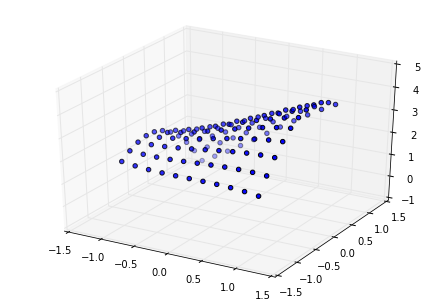

In [44]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_array,y_array,t_array) #<---ここでplot

In [30]:
phi_00 =lambda a,b : 1
phi_10 =lambda a,b : a
phi_01 =lambda a,b : b
phi_20 =lambda a,b : a**2
phi_11 =lambda a,b : a*b
phi_02 =lambda a,b : b**2
#lambda(無名関数)で基底関数を作る

In [31]:
phi = [phi_00, phi_10,phi_01,phi_20,phi_11,phi_02]
#基底関数の組み合わせ

In [61]:
p=(3,4)
phi_p=[0]*len(phi)
for i, ph in enumerate (phi):
    phi_p[i]=ph(*p)
#enumerate：インデックスとともにループ

In [62]:
phi_p

[1, 3, 4, 9, 12, 16]

In [43]:
tuple(p)

(3, 4)

In [56]:
some_list=[0]*5

In [57]:
some_list

[10]

SyntaxError: invalid syntax (<ipython-input-1-6b9df56f587c>, line 4)